In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

In [ ]:
#@title read data and save it in dataframe
import kagglehub

#https://www.kaggle.com/datasets/amankumar094/lung-cancer-dataset/data
path = kagglehub.dataset_download("amankumar094/lung-cancer-dataset")
df = pd.read_csv(path + "/dataset_med.csv")



In [ ]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [ ]:
df.drop(columns=['id'],inplace=True)

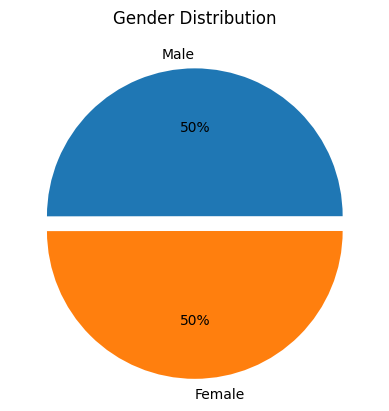

In [ ]:
#@title Gender
plt.pie(df.gender.value_counts(),labels=['Male','Female'],autopct='%0.0f%%',explode=(0,0.1))
plt.title('Gender Distribution')
plt.show()

df.gender = df.gender.map(lambda x :{'Male':1,'Female':2}.get(x,x))

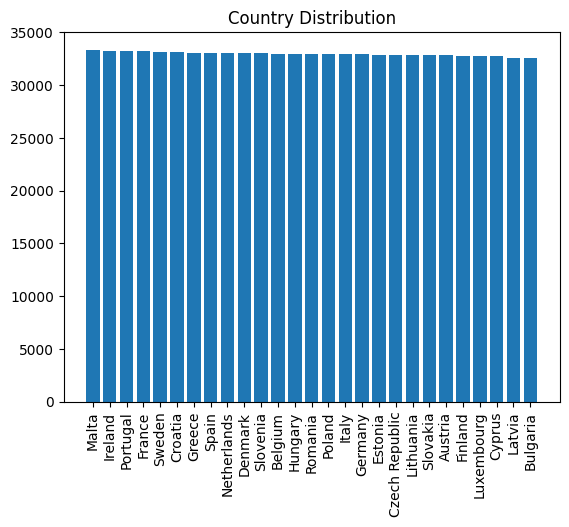

In [ ]:
#@title Country
plt.bar(df.country.value_counts().index,df.country.value_counts())
plt.xticks(rotation=90)
plt.title('Country Distribution')
plt.show()

df.drop(columns=['country'],inplace=True)

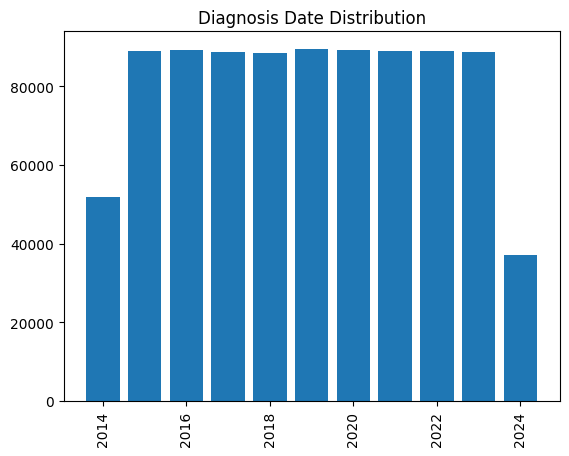

In [ ]:
#@title Diagnosis_date
df.diagnosis_date = df.diagnosis_date.map(lambda x : pd.to_datetime(x,format = '%Y-%m-%d').year)

plt.bar(df.diagnosis_date.value_counts().index,df.diagnosis_date.value_counts())
plt.xticks(rotation=90)
plt.title('Diagnosis Date Distribution')
plt.show()

df.drop(columns=['diagnosis_date'],inplace=True)

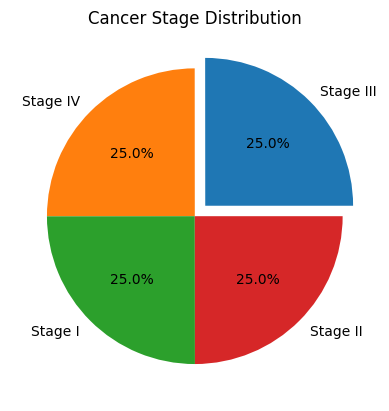

In [ ]:
#@title Cancer Stage
plt.pie(df.cancer_stage.value_counts(), labels=df.cancer_stage.value_counts().index, autopct='%1.1f%%',explode=(0.1,0,0,0))
plt.title('Cancer Stage Distribution')
plt.show()


df.cancer_stage = df.cancer_stage.map(lambda x :{'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4}.get(x,x))

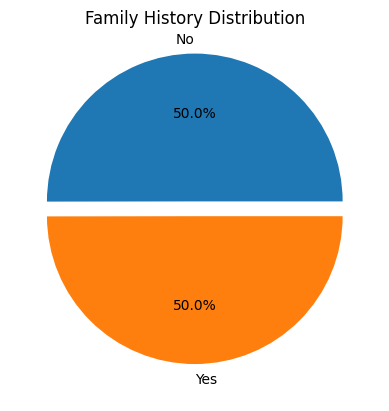

In [ ]:
#@title Family History
plt.pie(df.family_history.value_counts(), labels=df.family_history.value_counts().index, autopct='%1.1f%%',explode=(0.1,0))
plt.title('Family History Distribution')
plt.show()

df.family_history = df.family_history.map(lambda x :{'Yes':1,'No':0}.get(x,x))

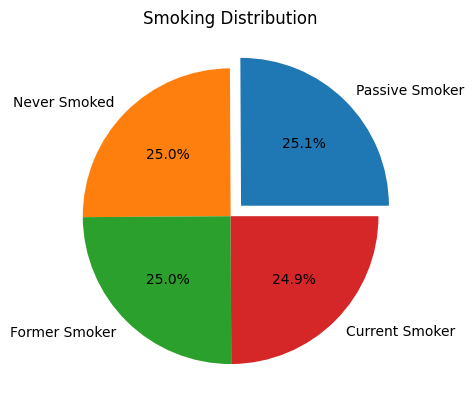

In [ ]:
#@title Smoking Status
plt.pie(df.smoking_status.value_counts(), labels=df.smoking_status.value_counts().index, autopct='%1.1f%%',explode=(0.1,0,0,0))
plt.title('Smoking Distribution')
plt.show()

df.smoking_status = df.smoking_status.map(lambda x :{'Never Smoked':0 ,'Former Smoker':1,'Passive Smoker':2,'Current Smoker':3}.get(x,x))

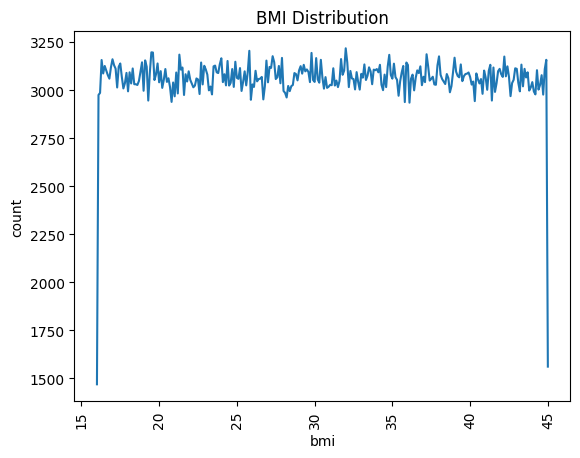

In [ ]:
#@title Bmi
sns.lineplot(x=df.bmi.value_counts().index,y=df.bmi.value_counts())
plt.xticks(rotation=90)
plt.title('BMI Distribution')
plt.show()

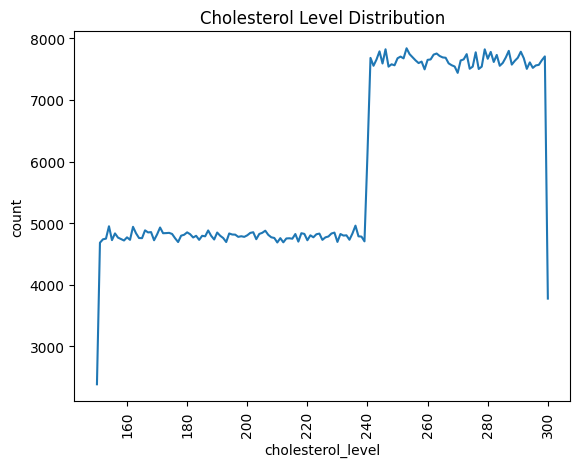

In [ ]:
#@title Cholesterol Level
sns.lineplot(x=df.cholesterol_level.value_counts().index,y=df.cholesterol_level.value_counts())
plt.xticks(rotation=90)
plt.title('Cholesterol Level Distribution')
plt.show()

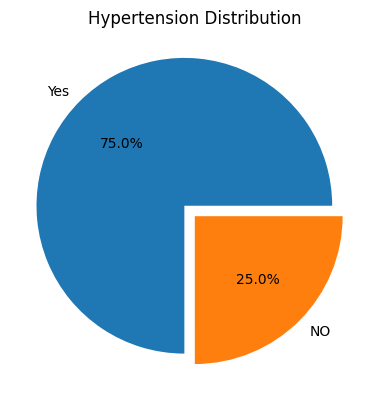

In [ ]:
#@title Hypertension
plt.pie(df.hypertension.value_counts(), labels=['Yes','NO'], autopct='%1.1f%%',explode=(0.1,0))
plt.title('Hypertension Distribution')
plt.show()

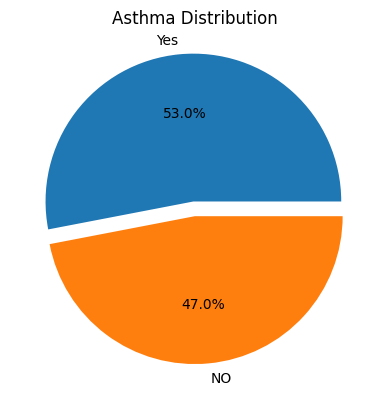

In [ ]:
#@title Asthma
plt.pie(df.asthma.value_counts(), labels=['Yes','NO'], autopct='%1.1f%%',explode=(0.1,0))
plt.title('Asthma Distribution')
plt.show()

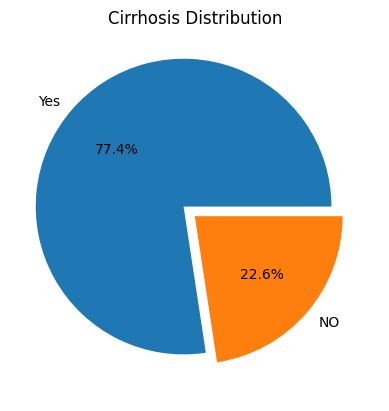

In [ ]:
#@title Cirrhosis
plt.pie(df.cirrhosis.value_counts(), labels=['Yes','NO'], autopct='%1.1f%%',explode=(0.1,0))
plt.title('Cirrhosis Distribution')
plt.show()

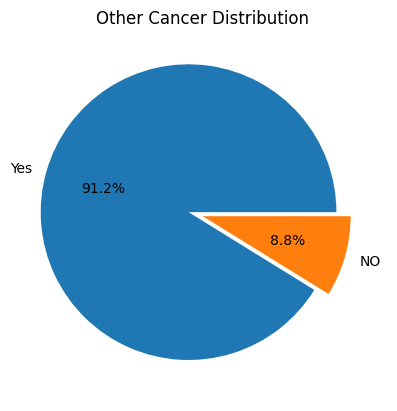

In [ ]:
#@title Other Cancer
plt.pie(df.other_cancer.value_counts(), labels=['Yes','NO'], autopct='%1.1f%%',explode=(0.1,0))
plt.title('Other Cancer Distribution')
plt.show()

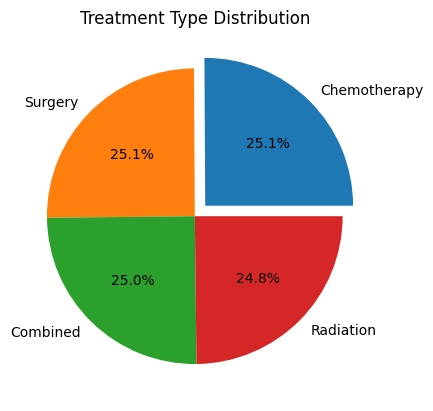

In [ ]:
#@title Treatment Type
plt.pie(df.treatment_type.value_counts(), labels=df.treatment_type.value_counts().index, autopct='%1.1f%%',explode=(0.1,0,0,0))
plt.title('Treatment Type Distribution')
plt.show()

df.treatment_type = df.treatment_type.map(lambda x :{'Surgery':1,'Chemotherapy':2,'Radiation':3,'Combined':4}.get(x,x))

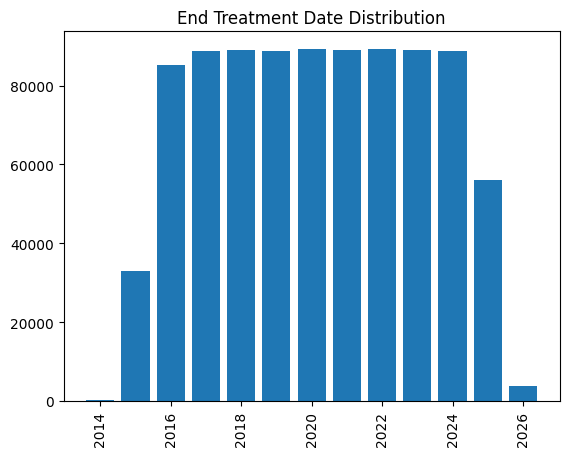

In [ ]:
#@title End Treatment Date
df.end_treatment_date = df.end_treatment_date.map(lambda x : pd.to_datetime(x,format = '%Y-%m-%d').year)

plt.bar(df.end_treatment_date.value_counts().index,df.end_treatment_date.value_counts())
plt.xticks(rotation=90)
plt.title('End Treatment Date Distribution')
plt.show()

df.drop(columns=['end_treatment_date'],inplace=True)

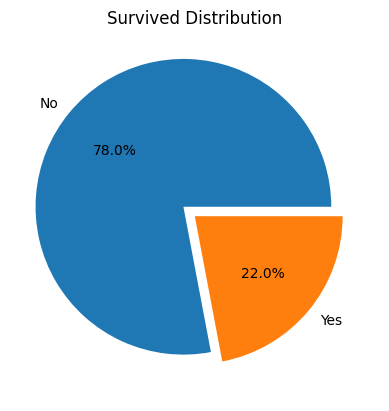

In [ ]:
#@title Survived
plt.pie(df.survived.value_counts(), labels=['No','Yes'], autopct='%1.1f%%',explode=(0.1,0))
plt.title('Survived Distribution')
plt.show()

In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

X = df.drop('survived', axis=1)
y = df['survived']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
df.survived.value_counts()

,count
survived,
0,693996
1,693996


<Axes: >

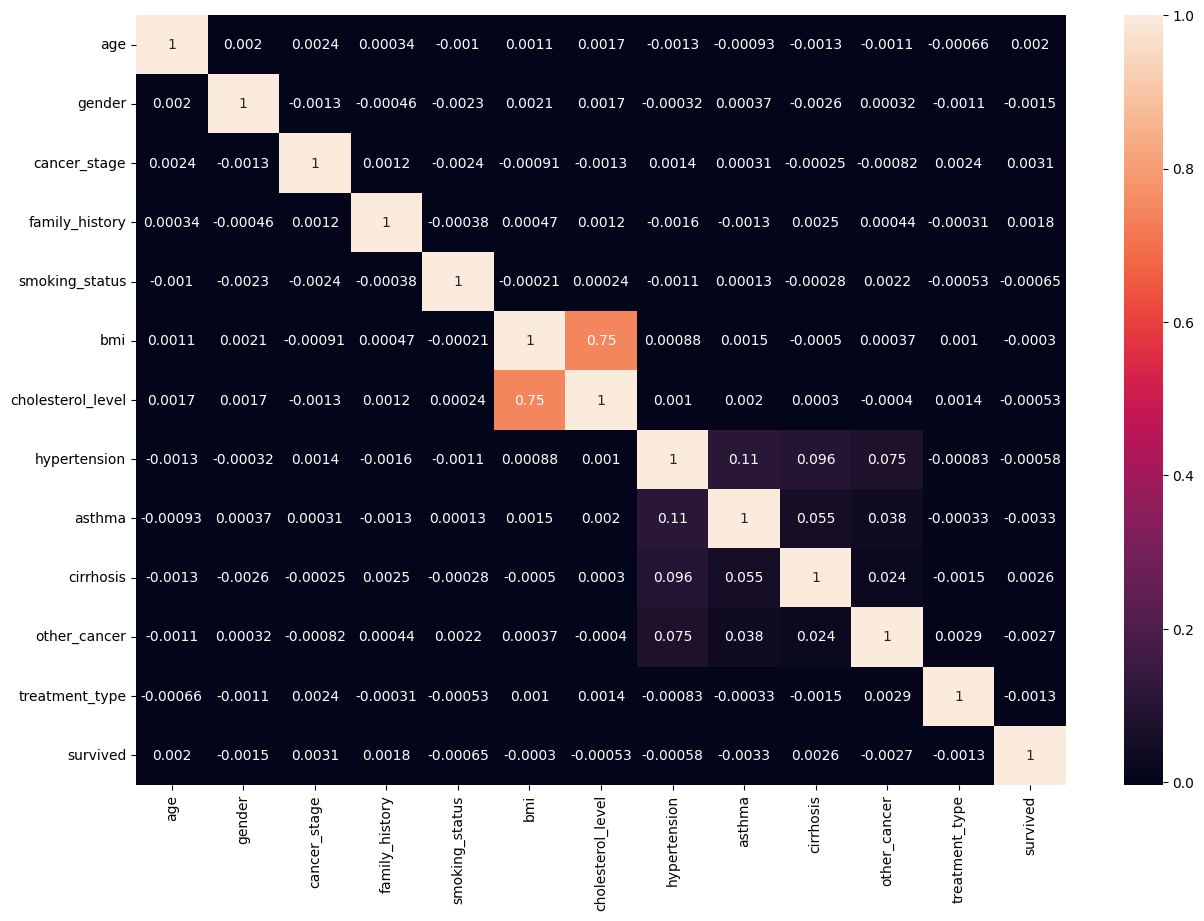

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(columns=['bmi'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['survived'])
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#@title plot
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix heatmap.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
    Call:
      plot_confusion_matrix(y_true, y_pred)
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

print(help(plot_confusion_matrix))

Help on function plot_confusion_matrix in module __main__:

plot_confusion_matrix(y_true, y_pred)
    Plots a confusion matrix heatmap.
    
    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
    Call:
      plot_confusion_matrix(y_true, y_pred)

None


In [ ]:
#@title KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62    207928
           1       0.63      0.76      0.69    208470

    accuracy                           0.66    416398
   macro avg       0.66      0.66      0.65    416398
weighted avg       0.66      0.66      0.65    416398



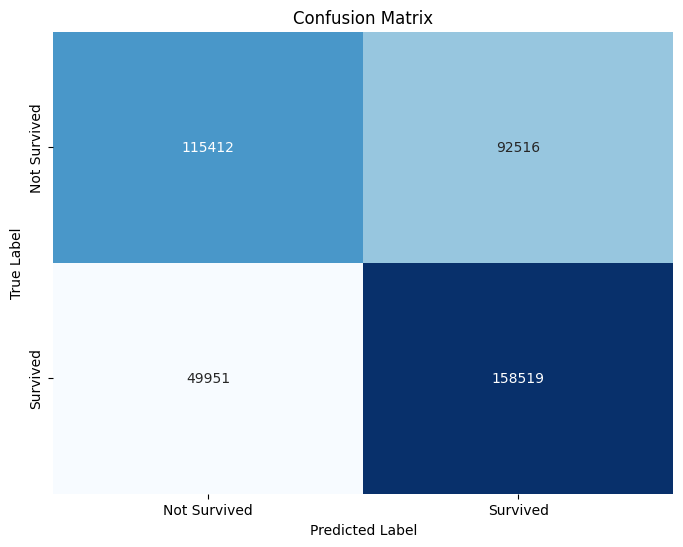

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
#@title Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79    207928
           1       0.76      0.93      0.83    208470

    accuracy                           0.82    416398
   macro avg       0.83      0.82      0.81    416398
weighted avg       0.83      0.82      0.81    416398



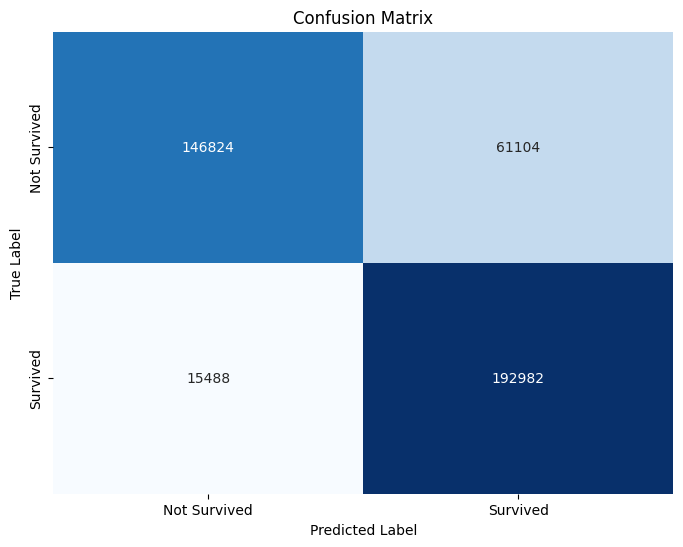

In [ ]:
plot_confusion_matrix(y_test, y_pred_dt)

In [ ]:
#@title Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84    207928
           1       0.81      0.92      0.86    208470

    accuracy                           0.85    416398
   macro avg       0.86      0.85      0.85    416398
weighted avg       0.86      0.85      0.85    416398



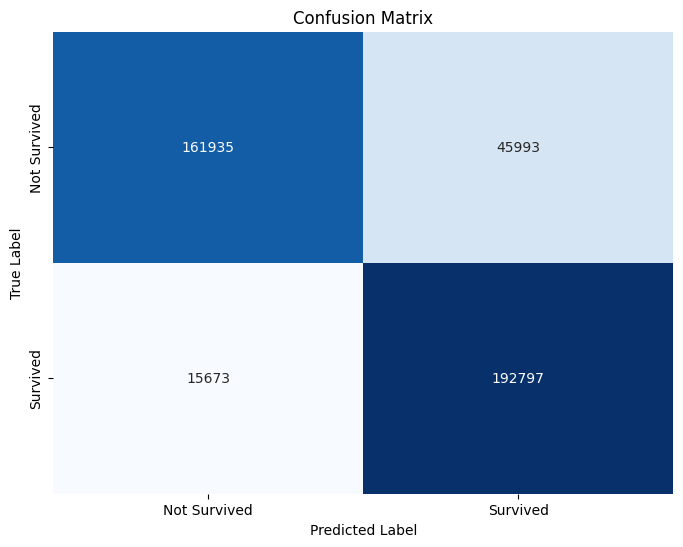

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf)

In [ ]:
#@title XGBoost
!pip install xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52    207928
           1       0.53      0.54      0.53    208470

    accuracy                           0.53    416398
   macro avg       0.53      0.53      0.53    416398
weighted avg       0.53      0.53      0.53    416398



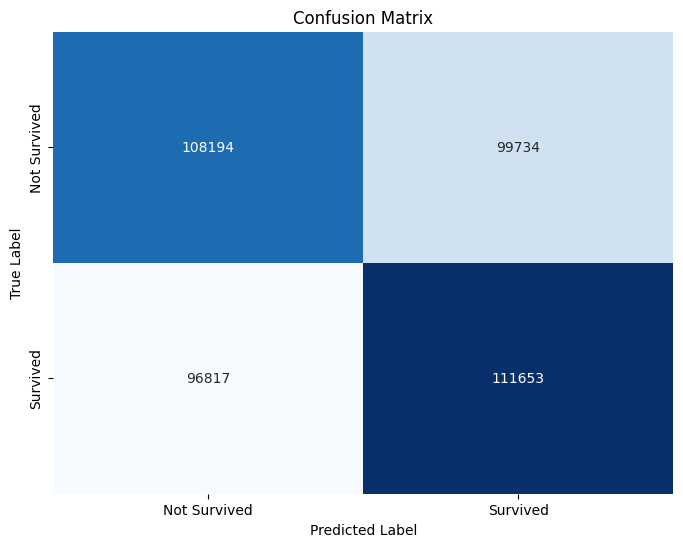

In [ ]:
plot_confusion_matrix(y_test, y_pred_xgb)

In [ ]:
#@title ANN
#!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'EarlyStopping' is not defined

In [ ]:
history = model.fit(X_train, y_train, epochs=10,batch_size=32, validation_split=0.2 ,callbacks=[early_stopping])

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
df.columns